In [1]:
import numpy as np 
from collections import defaultdict
import tabulate as tab
import matplotlib.pyplot as plt

In [2]:
vocab = dict()
with open ('hw4_vocab.txt','r') as f:
    for i, line in enumerate(f):
        vocab[i+1] = line.strip().lower()

print(vocab[1], vocab[500])

<unk> sold


In [3]:
lookup_table = {v: k for k, v in vocab.items()}

In [4]:
unigrams = dict() 
with open ('hw4_unigram.txt','r') as f:
    for i, line in enumerate(f):
        prob = int(line.strip()) 
        unigrams[i+1] = prob

In [5]:
bigrams = defaultdict(dict)
with open ('hw4_bigram.txt','r') as f:
    for line in f:
        i,i2, prob = map(int, line.strip().split())
        bigrams[i][i2] = prob

#### Part A:
Compute the maximum likelihood estimate of the unigram distribution Pu (w) over words w. Print out
a table of all the tokens (i.e., words) that start with the letter “M”, along with their numerical unigram
probabilities (not counts).

$P_{u}(w) = \frac{count(w)}{N}$

In [6]:
unigram_sum = sum(unigrams.values())
mle_unigram = {i: prob/unigram_sum for i, prob in unigrams.items()}

In [7]:
mle_unigram_m = [(vocab[i], prob) for i, prob in mle_unigram.items() if vocab[i].startswith('m')]
print(tab.tabulate(mle_unigram_m, headers=["Word","Probability"], tablefmt='pipe'))

| Word     |   Probability |
|:---------|--------------:|
| million  |   0.00207276  |
| more     |   0.0017089   |
| mr.      |   0.00144161  |
| most     |   0.000787917 |
| market   |   0.000780371 |
| may      |   0.000729897 |
| m.       |   0.000703407 |
| many     |   0.000696729 |
| made     |   0.000559861 |
| much     |   0.000514597 |
| make     |   0.000514463 |
| month    |   0.00044491  |
| money    |   0.000437107 |
| months   |   0.000405761 |
| my       |   0.000400318 |
| monday   |   0.000381985 |
| major    |   0.000370893 |
| military |   0.000352046 |
| members  |   0.000336061 |
| might    |   0.000273589 |
| meeting  |   0.000265737 |
| must     |   0.000266508 |
| me       |   0.000263573 |
| march    |   0.000259794 |
| man      |   0.000252883 |
| ms.      |   0.00023899  |
| minister |   0.000239773 |
| making   |   0.000211704 |
| move     |   0.000209956 |
| miles    |   0.000205969 |


#### Part B:
Compute the maximum likelihood estimate of the bigram distribution Pb(w ′ |w). Print out a table of
the ten most likely words to follow the word “THE”, along with their numerical bigram probabilities.

In [8]:
mle_bigram = defaultdict(dict)
for i in bigrams:
    for i2 in bigrams[i]:
        mle_bigram[i][i2] = bigrams[i][i2]/unigrams[i] 

In [9]:
the_index = [i for i in vocab if vocab[i] == 'the'][0]
sorted_best_the_bigrams = dict(sorted(mle_bigram[the_index].items(), key=lambda x: x[1], reverse=True)[:10])
the_bigrams = [(vocab[4], vocab[i], prob) for i, prob in sorted_best_the_bigrams.items()]
print(tab.tabulate(the_bigrams, headers=["Word","Following Word","Probability"], tablefmt='pipe'))

| Word   | Following Word   |   Probability |
|:-------|:-----------------|--------------:|
| the    | <unk>            |    0.61502    |
| the    | u.               |    0.0133725  |
| the    | first            |    0.0117203  |
| the    | company          |    0.0116588  |
| the    | new              |    0.00945148 |
| the    | united           |    0.00867231 |
| the    | government       |    0.00680349 |
| the    | nineteen         |    0.00665071 |
| the    | same             |    0.00628707 |
| the    | two              |    0.00616075 |


#### Part C
Consider the sentence “The stock market fell by one hundred points last week.” Ignoring punctuation, compute and compare the log-likelihoods of this sentence under the unigram and bigram models.

In [10]:
print(bigrams[2][4])
sentence = str("The stock market fell by one hundred points last week").lower().split()
print(sentence)

479427
['the', 'stock', 'market', 'fell', 'by', 'one', 'hundred', 'points', 'last', 'week']


In [11]:
def get_unigram_log_likelihood(sentence, mle_unigram, lookup_table):
    unigram_log_likelihood = 0.0
    for token in sentence:
        token_index = lookup_table[token]
        unigram_log_likelihood += np.log(mle_unigram[token_index])
    return unigram_log_likelihood

In [12]:
unigram_log_likelihood = get_unigram_log_likelihood(sentence, mle_unigram, lookup_table)
print(unigram_log_likelihood)

-64.50944034364878


In [13]:
def get_bigram_log_likelihood(sentence, mle_bigram, lookup_table):
    bigram_log_likelihood = 0.0
    unk_bigram_log_likelihood = 0.0
    unk_index = lookup_table['<unk>']
    unobserved_bigrams = []
    for i in range(len(sentence)):
        token = lookup_table[sentence[i]]
        if i == 0:
            prev_token = lookup_table["<s>"]
        else:
            prev_token = lookup_table[sentence[i-1]] 
        if not mle_bigram[prev_token].get(token):
            unobserved_bigrams.append((vocab[prev_token], vocab[token]))
            bigram_log_likelihood += -np.inf # equivalent to np.log(0)
            unk_bigram_log_likelihood += np.log(mle_bigram[prev_token][unk_index])
            continue
        bigram_log_likelihood += np.log(mle_bigram[prev_token][token])
        unk_bigram_log_likelihood += np.log(mle_bigram[prev_token][token])
    return bigram_log_likelihood, unk_bigram_log_likelihood, unobserved_bigrams

In [14]:
bigram_log_likelihood, unk_bigram_log_likelihood, unobserved_bigrams = \
get_bigram_log_likelihood(sentence, mle_bigram, lookup_table)
print(bigram_log_likelihood)

-40.91813213378977


#### Part D 
Consider the sentence “The sixteen officials sold fire insurance.” Ignoring punctuation, compute
and compare the log-likelihoods of this sentence under the unigram and bigram models:

Which pairs of adjacent words in this sentence are not observed in the training corpus? What effect
does this have on the log-likelihood from the bigram model?

In [15]:
sentence = str("The sixteen officials sold fire insurance").lower().split()
print(sentence)

['the', 'sixteen', 'officials', 'sold', 'fire', 'insurance']


In [16]:
unigram_log_likelihood = get_unigram_log_likelihood(sentence, mle_unigram, lookup_table)
print(unigram_log_likelihood)

-44.291934473132606


In [17]:
bigram_log_likelihood, unk_bigram_log_likelihood, unobserved_bigrams = \
get_bigram_log_likelihood(sentence, mle_bigram, lookup_table)

print(unk_bigram_log_likelihood)
print(bigram_log_likelihood)
print(unobserved_bigrams)

-29.451555229472003
-inf
[('sixteen', 'officials'), ('sold', 'fire')]


#### Part E 
Consider the so-called mixture model that predicts words from a weighted interpolation of the unigram
and bigram models:

$P_m(w'|w)= \lambda P_u(w') + (1-\lambda)P_b(w'|w)$

where λ ∈ [0, 1] determines how much weight is attached to each prediction. Compute and plot the value of this log-likelihood Lm as a function of the parameter λ ∈ [0, 1]. From your results, deduce the optimal value of λ to two significant digits.

In [18]:
print(sentence)

['the', 'sixteen', 'officials', 'sold', 'fire', 'insurance']


In [19]:
def mixture_model_log_likelihood(sentence, mle_unigram, mle_bigram, lookup_table, lambda_):
    mixture_log_likelihood = 0.0
    for i in range(len(sentence)):
        token = lookup_table[sentence[i]]
        if i == 0:
            prev_token = lookup_table["<s>"]
        else:
            prev_token = lookup_table[sentence[i-1]] 
        if not mle_bigram[prev_token].get(token):
            mix = np.log((lambda_ * mle_unigram[token]) + 0)
        else:
            mix = np.log((lambda_ * mle_unigram[token]) + ((1-lambda_) * mle_bigram[prev_token][token]))
        mixture_log_likelihood += mix
    return mixture_log_likelihood

Optimal lambda: 0.65


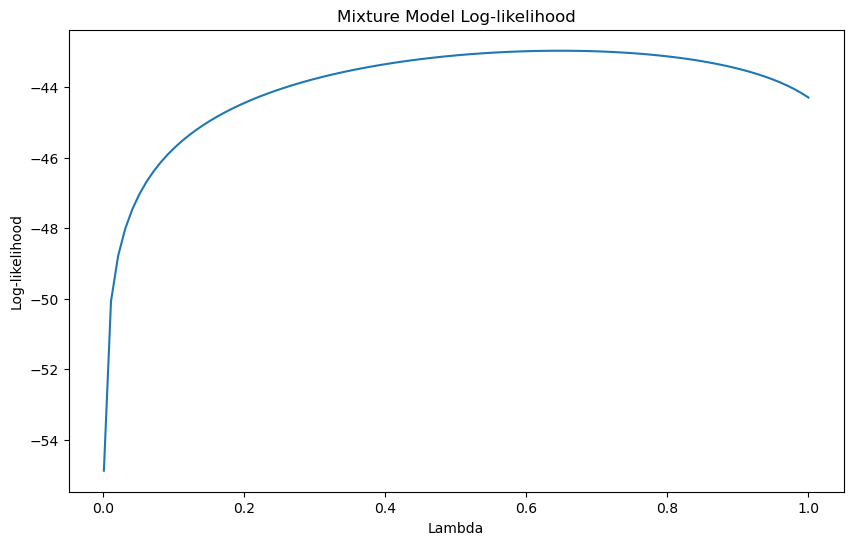

In [20]:
plt.figure(figsize=(10,6))
lambdas = np.linspace(0.001,1,100)
mixture_log_likelihoods = [mixture_model_log_likelihood(sentence, mle_unigram, mle_bigram, lookup_table, l) for l in lambdas]
max_lambda = lambdas[np.argmax(mixture_log_likelihoods)]
print(f"Optimal lambda: {max_lambda:.2f}")

plt.plot(lambdas, mixture_log_likelihoods)
plt.xlabel('Lambda')
plt.ylabel('Log-likelihood')
plt.title('Mixture Model Log-likelihood')
plt.show()